#### Introduction
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.
Note that this dataset will require some data wrangling in order to make it tidy for analysis. There are multiple cities covered by the linked system, and multiple data files will need to be joined together if a full year’s coverage is desired.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
data = pd.read_csv('201901-fordgobike-tripdata.csv')

In [3]:
data.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip
182579,553,2019-01-03 08:49:58.2720,2019-01-03 08:59:12.2120,41.0,Golden Gate Ave at Polk St,37.781270,-122.418740,47.0,4th St at Harrison St,37.780955,-122.399749,5272,Subscriber,No
20039,655,2019-01-29 19:07:45.7200,2019-01-29 19:18:41.0660,259.0,Addison St at Fourth St,37.866249,-122.299371,259.0,Addison St at Fourth St,37.866249,-122.299371,4642,Subscriber,No
42768,613,2019-01-26 23:01:25.9910,2019-01-26 23:11:39.9840,195.0,Bay Pl at Vernon St,37.812314,-122.260779,214.0,Market St at Brockhurst St,37.823321,-122.275732,4640,Subscriber,No
25024,316,2019-01-29 10:19:21.7680,2019-01-29 10:24:37.7860,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,11.0,Davis St at Jackson St,37.797280,-122.398436,4571,Subscriber,No
122816,376,2019-01-14 10:43:10.2780,2019-01-14 10:49:26.4930,181.0,Grand Ave at Webster St,37.811377,-122.265192,195.0,Bay Pl at Vernon St,37.812314,-122.260779,4688,Subscriber,Yes
133150,401,2019-01-12 09:33:05.5700,2019-01-12 09:39:47.2600,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,368.0,Myrtle St at Polk St,37.785434,-122.419622,475,Subscriber,No
65735,278,2019-01-24 07:38:13.0780,2019-01-24 07:42:51.9810,16.0,Steuart St at Market St,37.794130,-122.394430,28.0,The Embarcadero at Bryant St,37.787168,-122.388098,3443,Subscriber,No
115208,6553,2019-01-15 18:48:55.1950,2019-01-15 20:38:08.3270,78.0,Folsom St at 9th St,37.773717,-122.411647,75.0,Market St at Franklin St,37.773793,-122.421239,5577,Subscriber,No
126039,449,2019-01-13 18:13:19.8830,2019-01-13 18:20:49.2700,58.0,Market St at 10th St,37.776619,-122.417385,98.0,Valencia St at 16th St,37.765052,-122.421866,5306,Subscriber,No
74835,658,2019-01-23 07:27:52.4800,2019-01-23 07:38:50.8040,70.0,Central Ave at Fell St,37.773311,-122.444293,223.0,16th St Mission BART Station 2,37.764765,-122.420091,5014,Subscriber,No


In [4]:
data.shape

(192082, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192082 entries, 0 to 192081
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             192082 non-null  int64  
 1   start_time               192082 non-null  object 
 2   end_time                 192082 non-null  object 
 3   start_station_id         191834 non-null  float64
 4   start_station_name       191834 non-null  object 
 5   start_station_latitude   192082 non-null  float64
 6   start_station_longitude  192082 non-null  float64
 7   end_station_id           191834 non-null  float64
 8   end_station_name         191834 non-null  object 
 9   end_station_latitude     192082 non-null  float64
 10  end_station_longitude    192082 non-null  float64
 11  bike_id                  192082 non-null  int64  
 12  user_type                192082 non-null  object 
 13  bike_share_for_all_trip  192082 non-null  object 
dtypes: f

In [6]:
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,192082.000000,191834.000000,192082.000000,192082.000000,191834.000000,192082.000000,192082.000000,192082.000000
mean,750.952473,132.841639,37.773438,-122.357820,131.218700,37.773570,-122.357419,4029.012609
std,1672.433843,109.662417,0.091433,0.109472,109.546275,0.091332,0.109058,1571.288901
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000
25%,333.000000,43.000000,37.770407,-122.412408,41.000000,37.771058,-122.411726,3088.000000
50%,528.000000,98.000000,37.780955,-122.398438,95.000000,37.781010,-122.398436,4748.000000
75%,821.000000,211.000000,37.795913,-122.294837,203.000000,37.796248,-122.294837,5173.000000
max,84002.000000,385.000000,37.880222,-121.874119,385.000000,37.880222,-121.874119,6638.000000


In [7]:
data.isnull().sum()

duration_sec                 0
start_time                   0
end_time                     0
start_station_id           248
start_station_name         248
start_station_latitude       0
start_station_longitude      0
end_station_id             248
end_station_name           248
end_station_latitude         0
end_station_longitude        0
bike_id                      0
user_type                    0
bike_share_for_all_trip      0
dtype: int64

In [8]:
data_clean = data[data['start_station_id'].isnull() == False]
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191834 entries, 0 to 192081
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             191834 non-null  int64  
 1   start_time               191834 non-null  object 
 2   end_time                 191834 non-null  object 
 3   start_station_id         191834 non-null  float64
 4   start_station_name       191834 non-null  object 
 5   start_station_latitude   191834 non-null  float64
 6   start_station_longitude  191834 non-null  float64
 7   end_station_id           191834 non-null  float64
 8   end_station_name         191834 non-null  object 
 9   end_station_latitude     191834 non-null  float64
 10  end_station_longitude    191834 non-null  float64
 11  bike_id                  191834 non-null  int64  
 12  user_type                191834 non-null  object 
 13  bike_share_for_all_trip  191834 non-null  object 
dtypes: f

#### Data Cleaning
1. Since We already see our data doesn't consist any Missing values now.
2. From assessing our data we see that there are some quality issues that need to be taken care.
3. Changing datatypes of column into there right format:
   - start_time/end_time: timestamp
   - user_type: category
   - bike_share_for_all_trip: category
   - bike_id: object
   - start_station_id: object
   - end_station_id: object
   



In [9]:
data_clean.start_time = pd.to_datetime(data_clean.start_time)
data_clean.end_time = pd.to_datetime(data_clean.end_time)

C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [10]:
data_clean.user_type = data_clean.user_type.astype('category')
data_clean.bike_share_for_all_trip = data_clean.bike_share_for_all_trip.astype('category')

In [11]:
data_clean.bike_id = data_clean.bike_id.astype(str)
data_clean.start_station_id = data_clean.start_station_id.astype(str)
data_clean.end_station_id = data_clean.end_station_id.astype(str)

In [12]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 191834 entries, 0 to 192081
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             191834 non-null  int64         
 1   start_time               191834 non-null  datetime64[ns]
 2   end_time                 191834 non-null  datetime64[ns]
 3   start_station_id         191834 non-null  object        
 4   start_station_name       191834 non-null  object        
 5   start_station_latitude   191834 non-null  float64       
 6   start_station_longitude  191834 non-null  float64       
 7   end_station_id           191834 non-null  object        
 8   end_station_name         191834 non-null  object        
 9   end_station_latitude     191834 non-null  float64       
 10  end_station_longitude    191834 non-null  float64       
 11  bike_id                  191834 non-null  object        
 12  user_type       

In [13]:
data_clean.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'bike_share_for_all_trip'],
      dtype='object')

**We can add columns for the weekday, starting time and ending time of the bike ride to understand the peek hours.
And one column of minutes duration for figuring out the trips made by bike rider.**

In [14]:
# Start time weekday
data_clean['weekday'] = data_clean['start_time'].dt.strftime('%a')

C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [15]:
# Start and end time hour
data_clean['start_time_hour'] = data_clean['start_time'].dt.hour
data_clean['end_time_hour'] = data_clean['end_time'].dt.hour

C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# Duration in seconds to duration in minutes
data_clean['duration_min'] = data_clean['duration_sec']/60
data_clean['duration_min'] = data_clean['duration_min'].astype(int)

C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
data_clean.weekday.value_counts()

Thu    38401
Wed    35786
Tue    31303
Fri    28722
Mon    28598
Sat    16990
Sun    12034
Name: weekday, dtype: int64

We can calculate the total distance travelled by the bike rides.
This can be done using the 'Haversine Formula'.
Since we have latitude and longitude in our data we can easily create a function to calculate distance between starting point and ending point.
Here, we will add 2 columns distance in kms and distance in miles to understand the total distance travelled by bike rider.

Reference taken from:

https://github.com/chelseymarie6/Communicate-Data-Findings

https://www.movable-type.co.uk/scripts/latlong.html

In [18]:
import math
from math import radians, sin, cos, acos

def distance(start, end):

    lat1, long1 = start
    lat2, long2 = end
    radius = 6371
    
    latitude = math.radians(lat2 - lat1)
    longitude = math.radians(long2 - long1)
    
    a = (math.sin(latitude / 2) * math.sin(latitude / 2) + math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) * math.sin(longitude / 2) * math.sin(longitude / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c

    return d

In [19]:
data_clean['distance_in_km'] = data_clean.apply(lambda x: distance((x['start_station_latitude'], x['start_station_longitude']), (x['end_station_latitude'], x['end_station_longitude'])), axis=1)

C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
# Converting the kilometers to miles
data_clean['distance_in_miles'] = data_clean['distance_in_km'] * 0.621371

C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [21]:
print(data_clean.shape)
data_clean.sample(5)

(191834, 20)


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,bike_share_for_all_trip,weekday,start_time_hour,end_time_hour,duration_min,distance_in_km,distance_in_miles
18521,847,2019-01-30 06:22:11.931,2019-01-30 06:36:19.551,181.0,Grand Ave at Webster St,37.811377,-122.265192,173.0,Shattuck Ave at 55th St,37.840364,-122.264488,5123,Subscriber,No,Wed,6,6,14,3.223857,2.003211
151154,360,2019-01-09 12:38:00.040,2019-01-09 12:44:00.801,86.0,Market St at Dolores St,37.769305,-122.426826,58.0,Market St at 10th St,37.776619,-122.417385,4404,Subscriber,No,Wed,12,12,6,1.161844,0.721936
59327,617,2019-01-24 18:00:38.021,2019-01-24 18:10:55.689,247.0,Fulton St at Bancroft Way,37.867789,-122.265896,269.0,Telegraph Ave at Carleton St,37.862320,-122.258801,330,Subscriber,No,Thu,18,18,10,0.870524,0.540919
104456,722,2019-01-18 04:32:41.395,2019-01-18 04:44:43.462,47.0,4th St at Harrison St,37.780955,-122.399749,81.0,Berry St at 4th St,37.775880,-122.393170,5555,Subscriber,Yes,Fri,4,4,12,0.807924,0.502020
29815,247,2019-01-28 18:46:57.358,2019-01-28 18:51:05.021,171.0,Rockridge BART Station,37.844279,-122.251900,166.0,College Ave at Alcatraz Ave,37.851376,-122.252523,3054,Subscriber,No,Mon,18,18,4,0.791015,0.491514


#### What is the structure of your dataset?
Dataset consist of 191834 bike ride with 20 features that are
duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, bike_share_for_all_trip, weekday, start_time_hour, end_time_hour, duration_min, distance_in_km, distance_in_miles.

#### What is/are the main feature(s) of interest in your dataset?

Main feature(s) of Interest are:
1. Trip Duration.
2. User Type.
3. Start Station and End Station.
4. How long does the average trip take.
5. Which week day is more favourable by riders?
6. Peak hours.

And more we will look while exploration.

#### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The start date / time and duration details for each trip should help you explain how long and when a trip normally takes. Member information such as user type will help us find out who the main target customer groups are, use the various groups to summarize bike user data or whether there are any special trends related to a particular group of riders.

### Univariate Exploration of Data

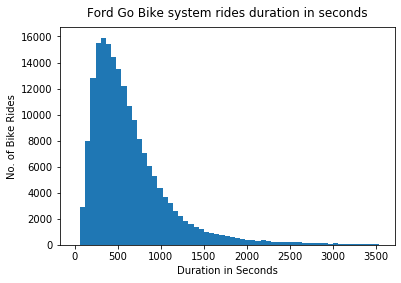

In [22]:
bin_edges = np.arange(0, 3600,60)

plt.hist(data = data_clean, x = 'duration_sec', bins = bin_edges)

plt.title("Ford Go Bike system rides duration in seconds", y=1.02)
plt.xlabel('Duration in Seconds')
plt.ylabel('No. of Bike Rides');

**Observations:**
Bike rides are of very short duration.But some of the rides last for more than 3500 secs also.

**Bike rides per weekday**

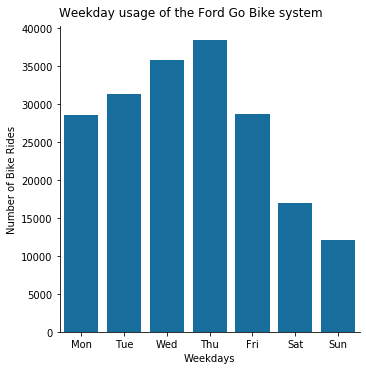

In [23]:
base_color = sb.color_palette('colorblind')[0]
#Weekday usage of the Ford Go Bike system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week = sb.catplot(data=data_clean, x='weekday', kind='count', color = base_color, order= weekday)
week.set_axis_labels("Weekdays", "Number of Bike Rides")
week.fig.suptitle('Weekday usage of the Ford Go Bike system', y = 1.02);

**Observations:**
Ford Go Bike System was popular on Thursdays followed by Tuesday and Wednesday for the Bike Rides.

**Peek Hours**

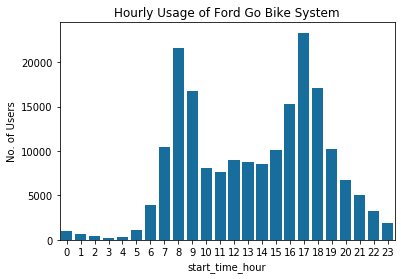

In [24]:
sb.countplot(data=data_clean, x='start_time_hour', color=base_color);
plt.title("Hourly Usage of Ford Go Bike System")
plt.xlabel('start_time_hour');
plt.ylabel('No. of Users');

**Observations:**
Hourly distribution is bimodal, the system is mainly used 8 am and 5pm more. As it is most common time for all the office workers and school, college students to go and come back. 

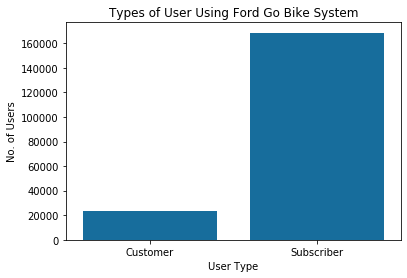

In [25]:
sb.countplot(data=data_clean, x='user_type', color=base_color);
plt.title("Types of User Using Ford Go Bike System")
plt.xlabel('User Type');
plt.ylabel('No. of Users');

**Observations:**
Mostly users are Subscriber of Ford Go Bike System.  

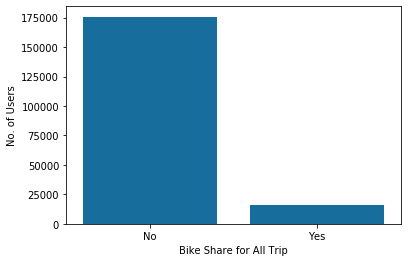

In [26]:
sb.countplot(data=data_clean, x='bike_share_for_all_trip', color=base_color);
plt.xlabel('Bike Share for All Trip');
plt.ylabel('No. of Users');

**Observations:** Mostly Users do not use bike share for all trip.

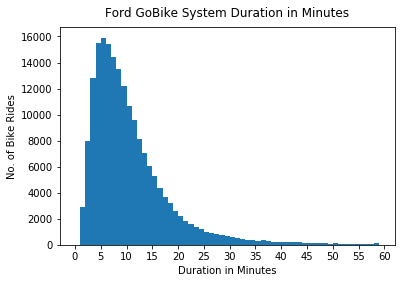

In [27]:
# Duration of the bike rides in MINUTES
bin_edges = np.arange(0, 60, 1)
ticks = [0, 5, 10, 15, 20, 25, 30,  35, 40, 45,50, 55,60]
labels = ['{}'.format(val) for val in ticks]

sb.distplot(data_clean['duration_min'], bins = bin_edges, kde = False, hist_kws = {'alpha' : 1});

plt.title("Ford GoBike System Duration in Minutes", y=1.02)
plt.xlabel('Duration in Minutes')
plt.xticks(ticks, labels)
plt.ylabel('No. of Bike Rides');

In [28]:
data_clean.distance_in_km.mean()

1.697794511167325

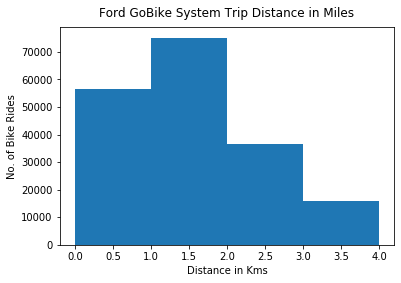

In [29]:
# Distance in kilometers travelled
bin_edges = np.arange(0, 5, 1)
plt.hist(data = data_clean, x = 'distance_in_km', bins = bin_edges);
plt.title("Ford GoBike System Trip Distance in Miles", y=1.02)
plt.xlabel('Distance in Kms')
plt.ylabel('No. of Bike Rides');

**Observations:**
Mean distance travelled is 1.698 kms and with this distance there are around 70k bike rides.From histogram we can also see that for longer kms the Bike rides are less.Users using Ford Go Bike System for shorter distances for like 1-2kms.

In [30]:
data_clean.distance_in_miles.mean()

1.0549602731985408

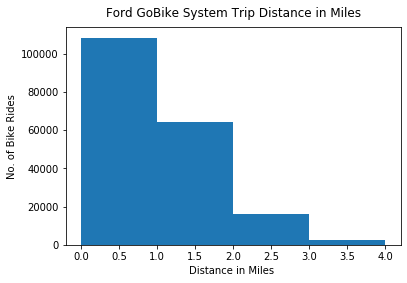

In [31]:
# Distance in miles travelled
bin_edges = np.arange(0, 5, 1)
plt.hist(data = data_clean, x = 'distance_in_miles', bins = bin_edges);
plt.title("Ford GoBike System Trip Distance in Miles", y=1.02)
plt.xlabel('Distance in Miles ')
plt.ylabel('No. of Bike Rides');

**Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?**
Following observations made from the above distributions:
1. Bike rides are of very short duration that is 5-10 mins.But some of the rides last for more than 3500 secs also. 
2. Ford Go Bike System was popular on Thursdays followed by Tuesday and Wednesday for the Bike Rides.
3. Hourly distribution is bimodal, the system is mainly used 8 am and 5pm more. As it is most common time for all the office workers and school, college students to go and come back. 
4. Mostly users are Subscriber of Ford Go Bike System.
5. Mean distance travelled is 1.698 kms and with this distance there are around 70k bike rides.From histogram we can also see that for longer kms the Bike rides are less.Users using Ford Go Bike System for shorter distances for like 1-2kms.

None of the features were there any unusual points.No transformation was needed luckily due to the straightforwardness of the data.


**Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?**

Yes, we did perform some operations on the data on the data to tidy, adjust, or change the form of the data because:
- There were some missing values in our data so we remove that rows.
- our data we see that there are some quality issues
- Changing datatypes of column into there right format:
        * start_time/end_time: timestamp
        * user_type: category
        * bike_share_for_all_trip: category
        * bike_id: object
        * start_station_id: object
        * end_station_id: object
- We add columns for the weekday, starting time and ending time of the bike ride to understand the peek hours. And one column of minutes duration for figuring out the rides made by bike rider.

### Bivariate Exploration of Data

In [32]:
customer = data_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = data_clean.query('user_type == "Subscriber"')['bike_id'].count()
customer_proportion = customer / data_clean['bike_id'].count()
subscriber_proportion = subscriber / data_clean['bike_id'].count()

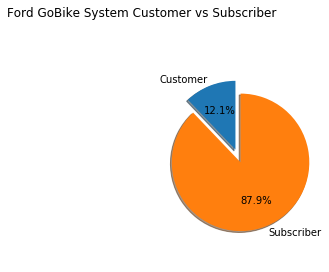

In [33]:
#plotting pie chart customer vs subscriber 
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
explode = (0, 0.2)
plt.pie(sizes, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.suptitle('Ford GoBike System Customer vs Subscriber ', y=1.02);

**Observation:**
So, Ford GoBike System is mostly used by subscribers 87.9%. 

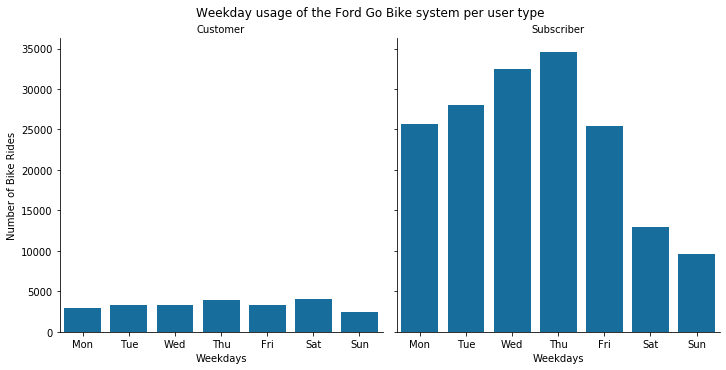

In [34]:
base_color = sb.color_palette('colorblind')[0]
#Weekday usage of the Ford Go Bike system per user type
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
week = sb.catplot(data=data_clean, x='weekday',col = 'user_type',sharey = True, kind='count', color = base_color, order= weekday)
week.set_axis_labels("Weekdays", "Number of Bike Rides")
week.set_titles("{col_name}")
week.fig.suptitle('Weekday usage of the Ford Go Bike system per user type', y = 1.02);

**Observation:**
Here, we see that customer usually a occasional riders and using the Ford Go Bike system on holiday and weekend trips.
Subscriber uses highly system and a sharp decline on the weekend.

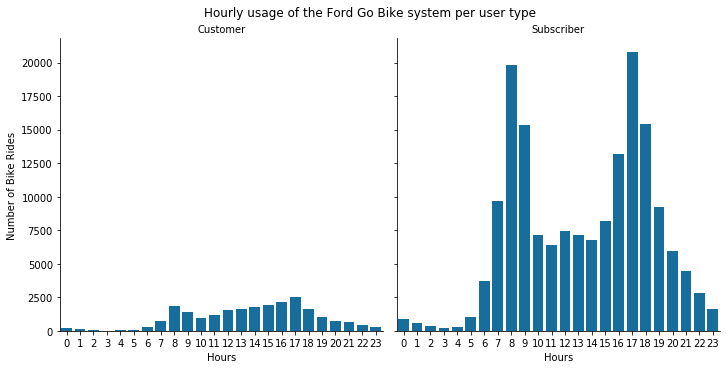

In [35]:
hours = sb.catplot(data=data_clean, x='start_time_hour',col = 'user_type',sharey = True, kind='count', color = base_color)
hours.set_axis_labels("Hours", "Number of Bike Rides")
hours.set_titles("{col_name}")
hours.fig.suptitle('Hourly usage of the Ford Go Bike system per user type', y = 1.02);

**Observation:**
This service is most frequently used by users around 8-9am and 5-6pm. This service is used by customers from 10am-5pm on weekends and 5-6pm on weekdays. Customers use this service for leisure time during the weekend and after work weekdays.

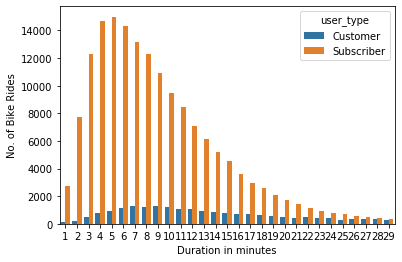

In [36]:
df = data_clean.query('duration_min<30')
sb.countplot(data=df, x='duration_min', hue='user_type');
plt.xlabel('Duration in minutes');
plt.ylabel('No. of Bike Rides');

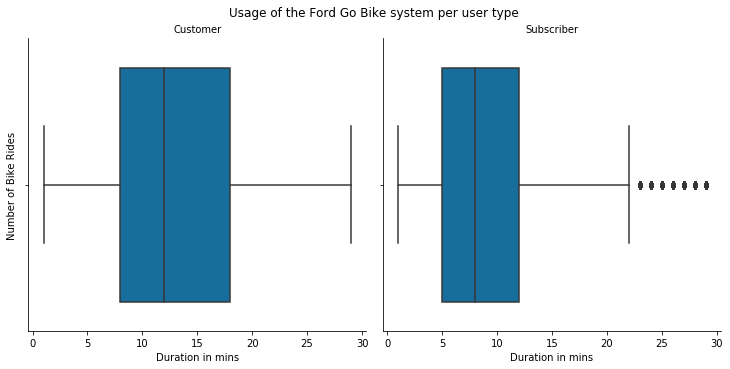

In [37]:
df = data_clean.query('duration_min<30')
mins = sb.catplot(data=df, x='duration_min',col = 'user_type', kind='box', color = base_color)
mins.set_axis_labels("Duration in mins", "Number of Bike Rides")
mins.set_titles("{col_name}")
mins.fig.suptitle('Usage of the Ford Go Bike system per user type', y = 1.02);

**Observation:**
Duration of Rides are longer for customers (Around 8-18 mins) as compare to Subscribers (Around 5-12 mins). This tells us that subscribers uses system for shortest span of time like for going school and office work.

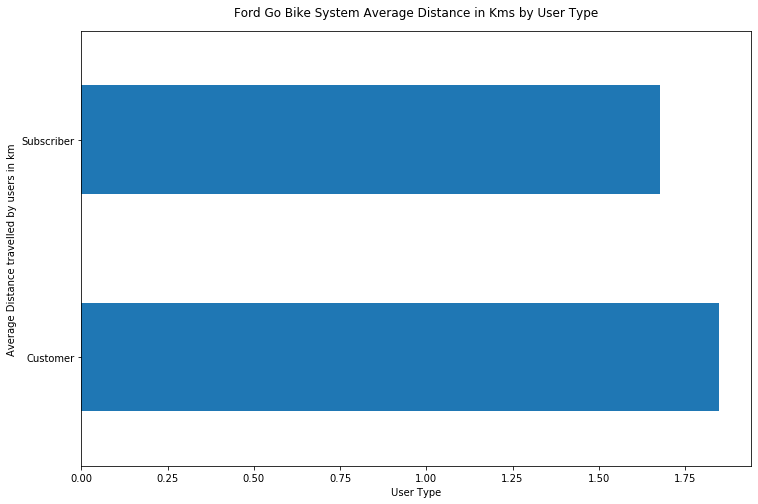

In [38]:
# Usage by Distance Customer vs. Subscriber
plt = data_clean.groupby('user_type')['distance_in_km'].mean().plot(kind='barh', figsize=(12,8));

plt.set_title('Ford Go Bike System Average Distance in Kms by User Type', y=1.02)
plt.set_xlabel('User Type')
plt.set_ylabel('Average Distance travelled by users in km');

**Observation:**
Customers' mean distance is significantly higher than subscribers. Since data exploration indicates that subscribers use the bike sharing system for transportation purposes, this suggestion also means that the subscribers' riding distance is less than the customer's average trip.

**Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?**

* The addition of the user type to the analysis revealed different usage of behavior between customers and subscribers.
* There are a lot more subscriber(87.9 %) usage than customers(12.1%).
* The data suggest that customers are casual riders such as tourists, or students on a school holiday or vacation. This is accurate if the usage of the customer increases on weekends and peaks in January.
* Subscribers are daily commuters. They rent bikes more frequently than weekends during the weekdays and mostly around the time they go back from work or school (8-9am and 5-6pm).
* Customers' mean distance is significantly higher than subscribers. Since data exploration indicates that subscribers use the bike sharing system for transportation purposes, this suggestion also means that the subscribers' riding distance is less than the customer's average trip.


**Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?**

There is a difference between customers and subscribers about the duration of the ride. Rides for customers are usually longer than for subscribers, most likely due to the fact that they prefer bike rides around the weekends, which could be for long rides around the area. Subscribers primarily use the system for commute purposes so they prefer fast, short journeys to and from work.

### Multivariate Exploration of Data

C:\Users\DHRUV VARSHNEY\anaconda3\lib\site-packages\seaborn\axisgrid.py:728: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


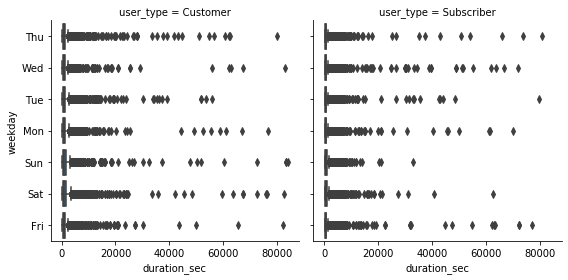

In [39]:
g = sb.FacetGrid(data = data_clean, col ='user_type' ,height = 4 )
g.map(sb.boxplot,'duration_sec','weekday')

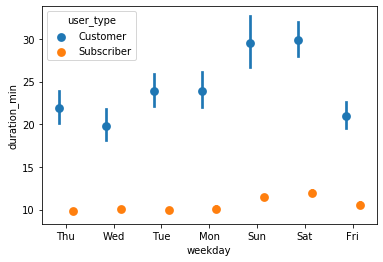

In [40]:
sb.pointplot(data=data_clean, x='weekday', y='duration_min', hue='user_type', dodge=0.3, linestyles="");

**Observations:**
From the above plot it can be seen that on each day of the week, subscribers ride far shorter trips compared to customers. Both types of users have an obvious increase in trip duration over weekends on Saturdays and Sundays, especially for casual riders. Usage by subscribers appears to be more effective than total customers and maintained a very stable average period from Monday through Friday.


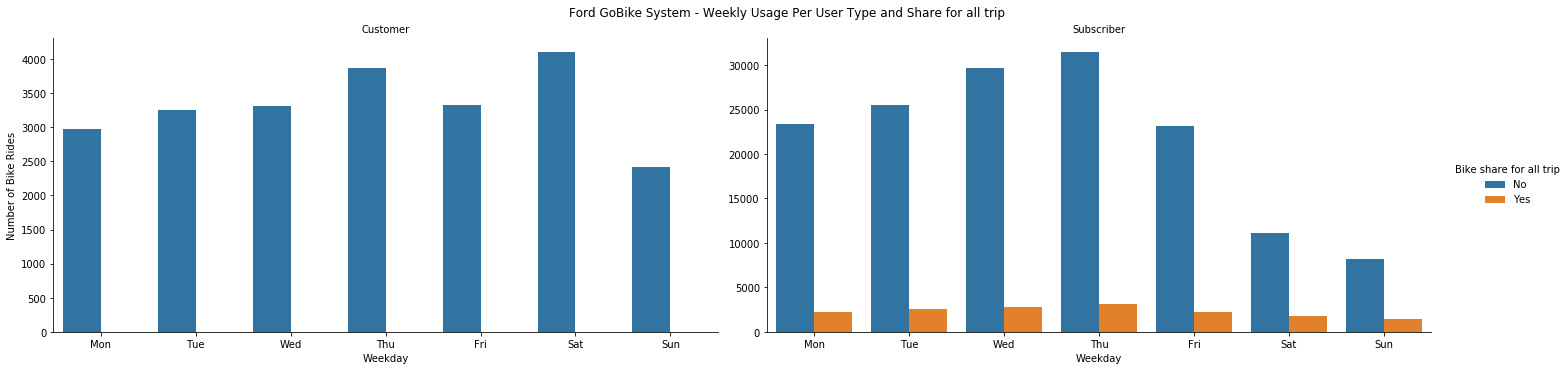

In [41]:
g= sb.catplot(data=data_clean, x='weekday', col="user_type", hue="bike_share_for_all_trip", kind='count',order= weekday, sharey = False, height=5, aspect=2);
g.set_axis_labels("Weekday", "Number of Bike Rides")
g._legend.set_title('Bike share for all trip')
g.set_titles("{col_name}")
g.fig.suptitle('Ford GoBike System - Weekly Usage Per User Type and Share for all trip', y=1.02);

**Observations:**
From the above plot it can be seen that subscriber shares a bike for all trip while on the other hand none customer do that.

**Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?**
* The multivariate exploration supported some of the patterns discovered during the previous bivariate exploration as well as univariate exploration, the relationship between the plotted multiple variables is fully visualized and information is presented in combination.
* The short usage period for subscribers corresponds to their high concentration on Monday through Friday rush hours, indicating that the use is primarily for work commutes.
* The more comfortable and versatile pattern of customer use suggests that they are taking full advantage of the bike sharing system very differently from the subscribers, perhaps for city tour or recreational purposes, mostly over the weekends and in the afternoon.
- Each day of the week, subscribers ride far shorter trips compared to customers. Both types of users have an obvious increase in trip duration over weekends on Saturdays and Sundays, especially for casual riders. Usage by subscribers appears to be more effective than total customers and maintained a very stable average period from Monday through Friday.

**Were there any interesting or surprising interactions between features?**

Intresting interactions between features:
More comfortable and versatile pattern of customer use suggests that they are taking full advantage of the bike sharing system very differently from the subscribers, perhaps for city tour or recreational purposes, mostly over the weekends and in the afternoon.

In [45]:
jupyter nbconvert presentation.ipynb --to slides --template output-toggle.tpl --post serve

SyntaxError: invalid syntax (<ipython-input-45-cc1ccbec0af6>, line 1)